In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## Phân cụm dữ liệu dựa trên 2 biến petal_length và petal_width 

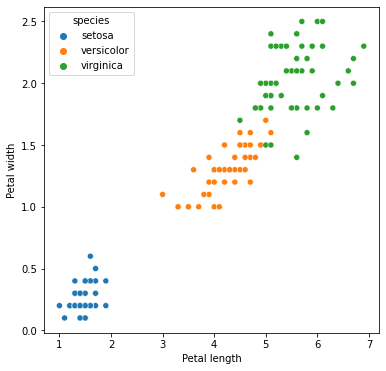

In [5]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data = df, x='petal_length', y='petal_width', hue='species')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

In [6]:
X = df[['petal_length', 'petal_width']] #phân cụm theo 2 thuộc tính

In [8]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [9]:
# tìm giá trị k phú hợp
distortions = []
K = range(1, 10)
for k in K:
    k_model = KMeans(n_clusters = k)
    k_model.fit(X)
    dis = sum(np.min(cdist(X, k_model.cluster_centers_, metric='euclidean'), axis=1)) / X.shape[0]
    distortions.append(dis)

In [10]:
distortions

[1.707364436891335,
 0.583920126422277,
 0.36876646966749166,
 0.2992242581050885,
 0.26508349289751987,
 0.23523461562225223,
 0.21851436966705923,
 0.20441635770565159,
 0.18410484384588674]

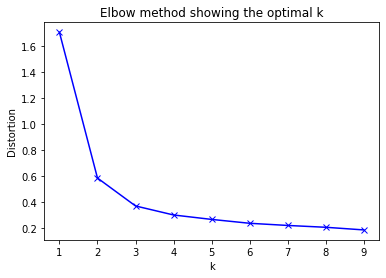

In [11]:
plt.plot(K, distortions, 'bx-')#color='blue', marker='x', linestyle='solid'
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow method showing the optimal k')
plt.show()

In [12]:
#chọn k = 3
model_kmean = KMeans(n_clusters=3)
model_kmean.fit(X)

KMeans(n_clusters=3)

In [13]:
centroids = model_kmean.cluster_centers_
labels = model_kmean.labels_
print(centroids)
print(labels)

[[5.59583333 2.0375    ]
 [1.462      0.246     ]
 [4.26923077 1.34230769]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]


In [14]:
X['cluster'] = pd.Series(labels)
X.head()

C:\Users\nhattan\AppData\Local\Temp/ipykernel_1084/2038507206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = pd.Series(labels)


,petal_length,petal_width,cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [15]:
X_test = np.array([[1.5, 0.4], [4.6, 1.6], [5.8, 2]])
results = model_kmean.predict(X_test)
results

c:\program files\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1, 2, 0])

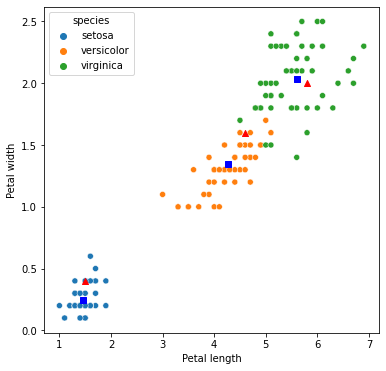

In [18]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data = df, x='petal_length', y='petal_width', hue='species')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='s', color='blue')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', color='red')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()